### AirBnb
#### Analyse de données en vue de la mise en place d'une IA

#### Traitement du dataframe

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler




Collecte des données

In [2]:
# Liste des fichiers CSV
liste = ["listings.csv", "listings (2).csv", "listings (3).csv"]

# Liste pour stocker les DataFrames
liste_dataframes = []

# Lire et ajouter chaque fichier CSV dans la liste de DataFrames
for l in liste:
    try:
        dff = pd.read_csv(l)
        liste_dataframes.append(dff)
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier {l}: {e}")

# Concaténer tous les DataFrames en un seul
if liste_dataframes:
    df = pd.concat(liste_dataframes, ignore_index=True)
    print("Tous les fichiers ont été concaténés avec succès.")
else:
    print("Aucun fichier n'a été ajouté.")

# Afficher les premières lignes du DataFrame concaténé pour vérification
print(df.head())


Erreur lors de la lecture du fichier listings (3).csv: [Errno 2] No such file or directory: 'listings (3).csv'
Tous les fichiers ont été concaténés avec succès.
       id                          listing_url       scrape_id last_scraped  \
0    3109    https://www.airbnb.com/rooms/3109  20240316023852   2024-03-19   
1  165409  https://www.airbnb.com/rooms/165409  20240316023852   2024-03-19   
2    5396    https://www.airbnb.com/rooms/5396  20240316023852   2024-03-18   
3  166370  https://www.airbnb.com/rooms/166370  20240316023852   2024-03-16   
4   39948   https://www.airbnb.com/rooms/39948  20240316023852   2024-03-19   

            source                                          name  \
0      city scrape                                  zen and calm   
1      city scrape               studio charme Haut Marais PARIS   
2      city scrape  Your perfect Paris studio on Île Saint-Louis   
3      city scrape             Big appartment with view 4 people   
4  previous scrape      

Prétraitement des données

In [3]:
# # Concaténation des données Paris
# data_march['month'] = 0
# data_december['month'] = 1
# data_september['month'] = 2
# dfs = [data_march, data_december, data_september]
# df = pd.concat(dfs)


In [4]:
# Nom des colonnes
cols = list(df.columns.values)
print(cols)
# Nombre de colonnes
print("Il y a ",len(cols), "colonnes")

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [5]:
# Sélection des colonnes pertinentes
columns_to_keep = ['host_is_superhost','host_location','latitude', 'longitude',
'accommodates','beds','bedrooms','number_of_reviews','review_scores_rating',
'host_listings_count','availability_30','minimum_nights', 'bathrooms', 'amenities',
'price', 'neighbourhood_cleansed', 'host_neighbourhood']

df = df[columns_to_keep]

Verification des duplications

In [6]:
print(df.duplicated().sum())
if df.duplicated().sum()>0:
    df.drop_duplicates()

87


In [7]:

# Identifier les données manquantes
df.isnull().sum()

host_is_superhost          1065
host_location             29390
latitude                      0
longitude                     0
accommodates                  0
beds                      24269
bedrooms                  22537
number_of_reviews             0
review_scores_rating      40327
host_listings_count          14
availability_30               0
minimum_nights                0
bathrooms                 91380
amenities                     0
price                     23480
neighbourhood_cleansed        0
host_neighbourhood        84112
dtype: int64

## Casting and filling NaN and outliers

In [8]:
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
#Remplacer toutes les valeurs numériques par la mediane
# Colonnes numériques
numerical_columns = ['accommodates', 'bedrooms', 'bathrooms','beds','availability_30', 'minimum_nights','host_listings_count']
# Créer un SimpleImputer avec la stratégie de remplacement par la médiane
imputer = SimpleImputer(strategy='median')
# Remplacer les valeurs nulles dans les colonnes numériques par leur médiane
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])
#Remplacer toutes les valeurs numériques par la moyenne
# Colonnes numériques
numerical_columns = ['number_of_reviews', 'review_scores_rating','price']
# Créer un SimpleImputer avec la stratégie de remplacement par la médiane
imputer = SimpleImputer(strategy='median')
df['host_location'].fillna('unknown', inplace=True)
# Remplacer les valeurs nulles dans les colonnes numériques par leur médiane
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])
# Remplacer les valeurs 't' par 1, les valeurs 'f' par 0, et les valeurs manquantes par 0
df['host_is_superhost'] = np.where(df['host_is_superhost'] == 't', 1, df['host_is_superhost'])
df['host_is_superhost'] = np.where(df['host_is_superhost'] == 'f', 0, df['host_is_superhost'])
df['host_is_superhost'] = df['host_is_superhost'].fillna(0).infer_objects().astype(int)

df.head(20)


,host_is_superhost,host_location,latitude,longitude,accommodates,beds,bedrooms,number_of_reviews,review_scores_rating,host_listings_count,availability_30,minimum_nights,bathrooms,amenities,price,neighbourhood_cleansed,host_neighbourhood
0,0,"Paris, France",48.83191,2.318700,2.0,1.0,1.0,4.0,5.00,1.0,29.0,2.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",250.0,Observatoire,Alésia
1,1,"Paris, France",48.86652,2.362610,2.0,1.0,0.0,106.0,4.68,1.0,15.0,3.0,1.0,"[""Lockbox"", ""Wifi"", ""Kitchen"", ""Refrigerator"",...",140.0,Temple,III Arrondissement
2,0,"Paris, France",48.85247,2.358350,2.0,1.0,0.0,393.0,4.60,2.0,0.0,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",107.0,Hôtel-de-Ville,Saint-Paul - Ile Saint-Louis
3,0,"Paris, France",48.87623,2.368690,4.0,1.0,1.0,78.0,4.56,1.0,29.0,2.0,1.0,"[""Shampoo"", ""Kitchen"", ""Washer"", ""Cooking basi...",200.0,Entrepôt,Canal Saint-Martin
4,1,"Paris, France",48.87068,2.344600,2.0,1.0,1.0,126.0,4.86,1.0,0.0,5.0,1.0,"[""Extra pillows and blankets"", ""Wifi"", ""Privat...",140.0,Bourse,II Arrondissement
5,0,"Paris, France",48.85719,2.378310,4.0,1.0,1.0,11.0,5.00,2.0,0.0,365.0,1.0,"[""Shampoo"", ""Carbon monoxide alarm"", ""Smoke al...",140.0,Popincourt,Bastille
6,1,"Paris, France",48.85909,2.353150,4.0,2.0,2.0,348.0,4.73,6.0,0.0,10.0,1.0,"[""Cooking basics"", ""Wifi"", ""Dedicated workspac...",134.0,Hôtel-de-Ville,Le Marais
7,0,"Paris, France",48.87438,2.372150,2.0,1.0,1.0,100.0,4.67,1.0,0.0,20.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",50.0,Entrepôt,Enclos-St-Laurent (X Arrondissement)
8,1,"Paris, France",48.85634,2.356950,4.0,2.0,1.0,111.0,4.76,1.0,25.0,5.0,1.0,"[""Shampoo"", ""Freezer"", ""Kitchen"", ""Extra pillo...",265.0,Hôtel-de-Ville,Le Marais
9,0,"Paris, France",48.86564,2.331840,4.0,3.0,2.0,177.0,4.72,2.0,9.0,1.0,1.5,"[""Cooking basics"", ""Pets allowed"", ""Wifi"", ""Po...",443.0,Louvre,Madeleine - Vendôme


In [9]:
# Supprimer les extremes - pour eviter de fausser l'IA
df = df.loc[(df['price'] >= 30) & (df['price'] <= 600)]
df.price.value_counts()

140.0    25058
100.0     3657
150.0     3518
120.0     3341
90.0      2780
         ...  
554.0        5
558.0        4
561.0        4
552.0        3
592.0        2
Name: price, Length: 571, dtype: int64

In [10]:
print(f'Lignes: {df.shape[0]}')

Lignes: 144374


#### IA

### Scale to fit Model

In [11]:
numeric_columns = df.select_dtypes(exclude='object').columns
df_selected = df[numeric_columns]
# print(df['property_type'])
# print(df['room_type'])
# print(df['host_is_superhost'])
# print(df[numeric_columns].host_is_superhost)
X = df_selected.drop('price', axis=1)
y = df_selected['price']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=1/3, random_state=1
)

 ### Linear Regression

R² sur les données de test : 0.2893368314724626


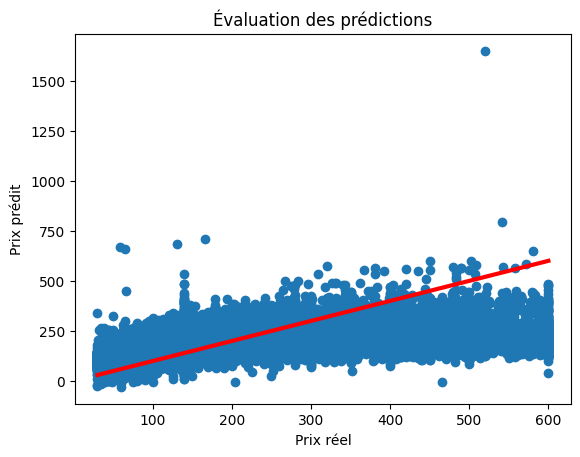

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_pred = r2_score(y_test, y_pred)
print(f"R² sur les données de test : {r2_pred}")

plt.scatter(y_test, y_pred)
plt.xlabel('Prix réel')
plt.ylabel('Prix prédit')
plt.title('Évaluation des prédictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=3)
plt.show()

#### Data Viz

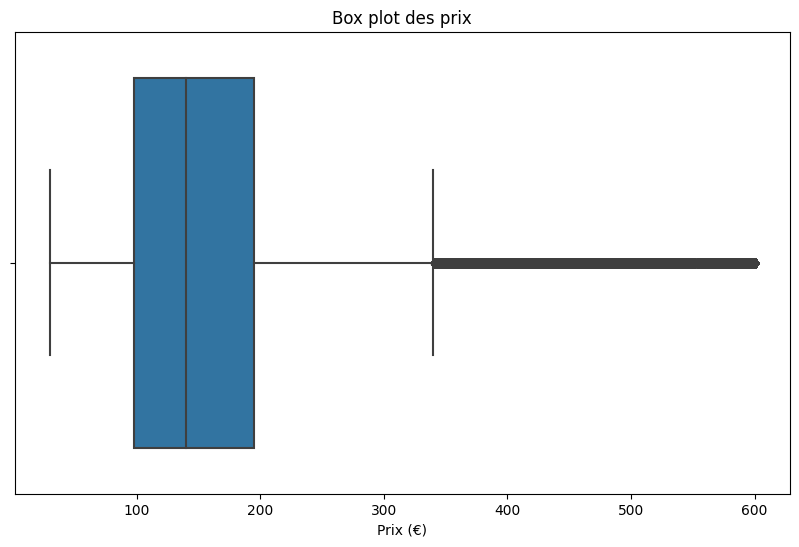

In [13]:
# Créer une boîte à moustaches
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.price)
plt.title('Box plot des prix')
plt.xlabel('Prix (€)')
plt.show()

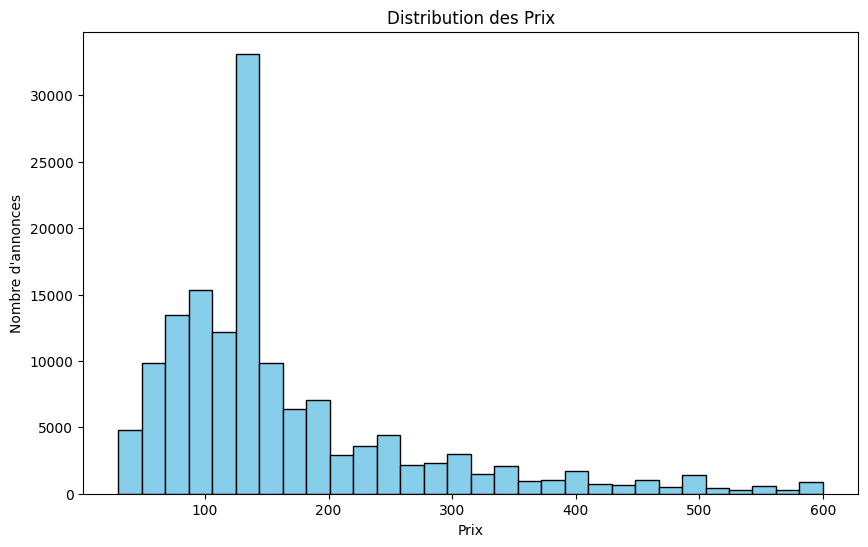

In [14]:
# Histogramme des prix
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution des Prix')
plt.xlabel('Prix')
plt.ylabel('Nombre d\'annonces')
plt.show()

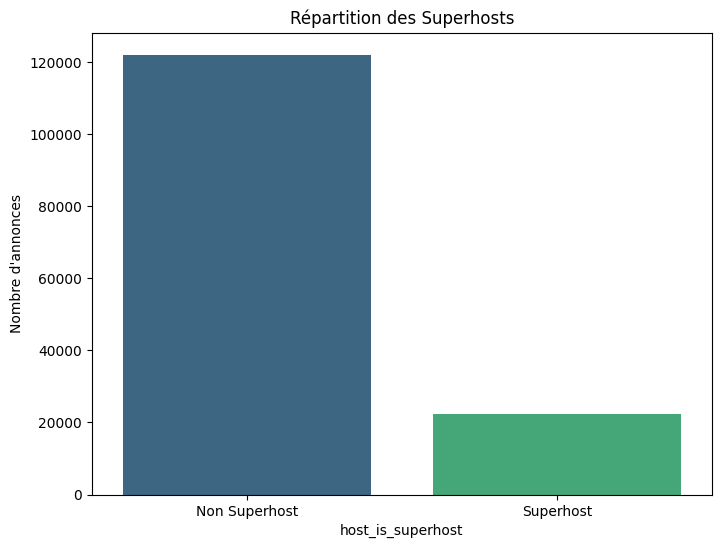

In [15]:
# La répartition des superhosts
superhost_labels = {'1': 'Superhost', '0': 'Non Superhost'}
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='host_is_superhost', data=df, palette='viridis')

ax.set_xticklabels([superhost_labels[tick.get_text()] for tick in ax.get_xticklabels()])

plt.title('Répartition des Superhosts')
plt.ylabel('Nombre d\'annonces')
plt.show()

### Location Data Visualization

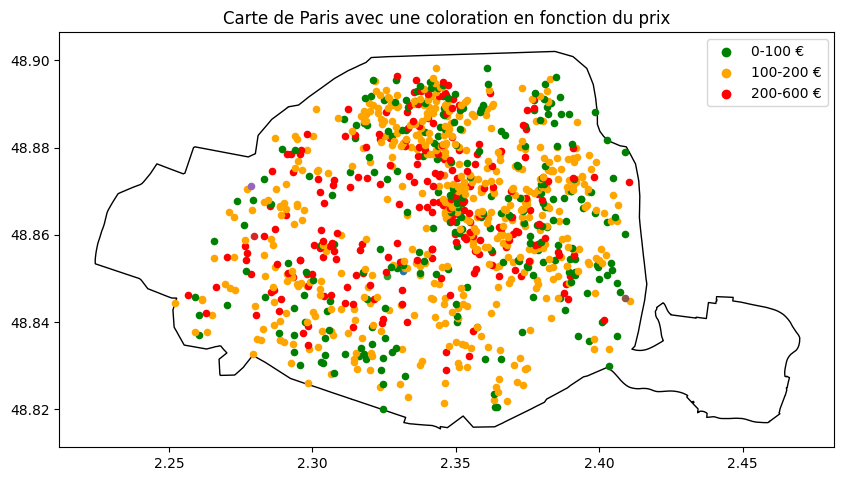

In [16]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point

df_paris = df
df_sample = df_paris.sample(n=1000)

geometry = [Point(xy) for xy in zip(df_sample['longitude'], df_sample['latitude'])]
geo_df = gpd.GeoDataFrame(df_sample, geometry=geometry, crs='EPSG:4326')

paris = ox.geocode_to_gdf("Paris, France")
paris = paris.to_crs(geo_df.crs)

merged = gpd.sjoin(paris, geo_df, predicate='contains')

price_ranges = [(0, 100), (100, 200), (200, 600)]
colors = ['green', 'orange', 'red']

def get_color(price):
    for i, (lower, upper) in enumerate(price_ranges):
        if lower <= price < upper:
            return colors[i]

fig, ax = plt.subplots(figsize=(10, 10))
paris.plot(ax=ax, edgecolor='black', color='white')

for index, row in merged.iterrows():
    color = get_color(row['price'])
    plt.scatter(row['longitude'], row['latitude'], color=color, s=20)

for i, (lower, upper) in enumerate(price_ranges):
    plt.scatter([], [], color=colors[i], label=f'{lower}-{upper} €')

plt.title('Carte de Paris avec une coloration en fonction du prix')
plt.legend()
plt.show()

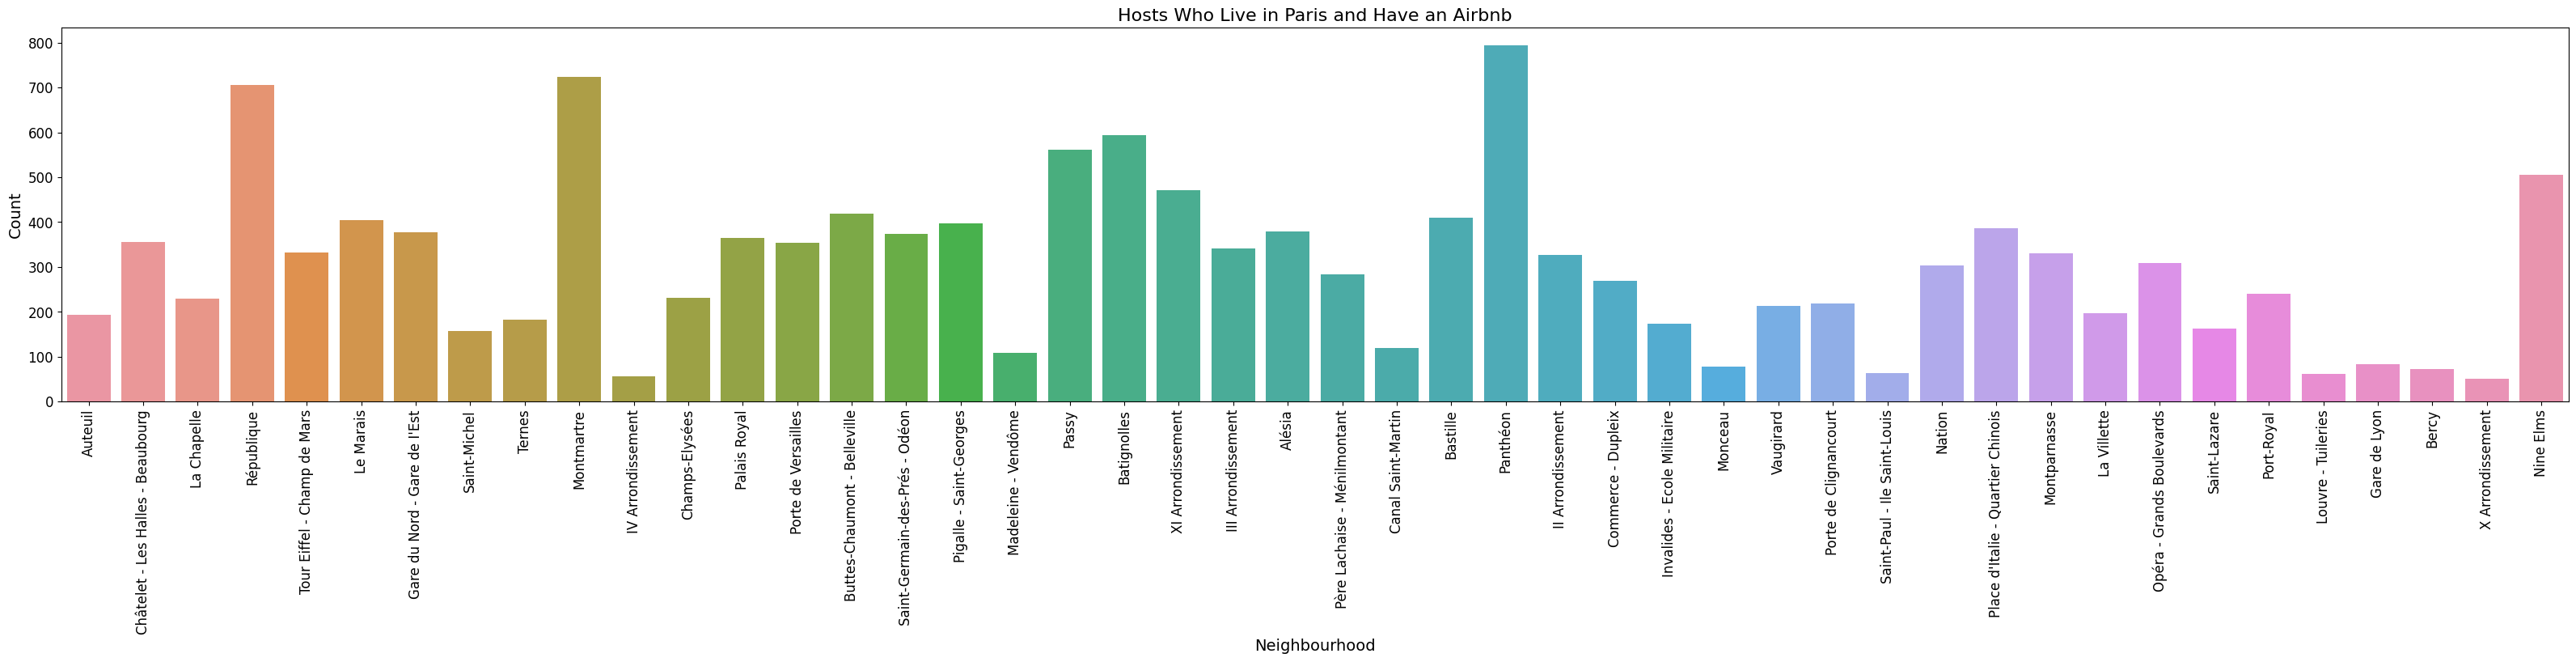

In [17]:
filtered_df = df[(df['host_location'] != 'Paris, France') & (~df['host_location'].isin(df['neighbourhood_cleansed']))]
filtered_df = filtered_df.groupby('host_neighbourhood').filter(lambda x: len(x) >= 50)
filtered_host_locations = filtered_df['host_location']
df_filter = [[filtered_host_locations]]
df_filter
 
# Set the figure size
plt.figure(figsize=(40, 6))
 
# Create the countplot
sns.countplot(data=filtered_df, x='host_neighbourhood')
 
# Set the plot title and labels with increased font size
plt.title("Hosts Who Live in Paris and Have an Airbnb", fontsize=16)
plt.xlabel("Neighbourhood", fontsize=14)
plt.ylabel("Count", fontsize=14)
 
# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)
 
# Increase the font size of x-axis and y-axis tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
 
# Show the plot
plt.show()

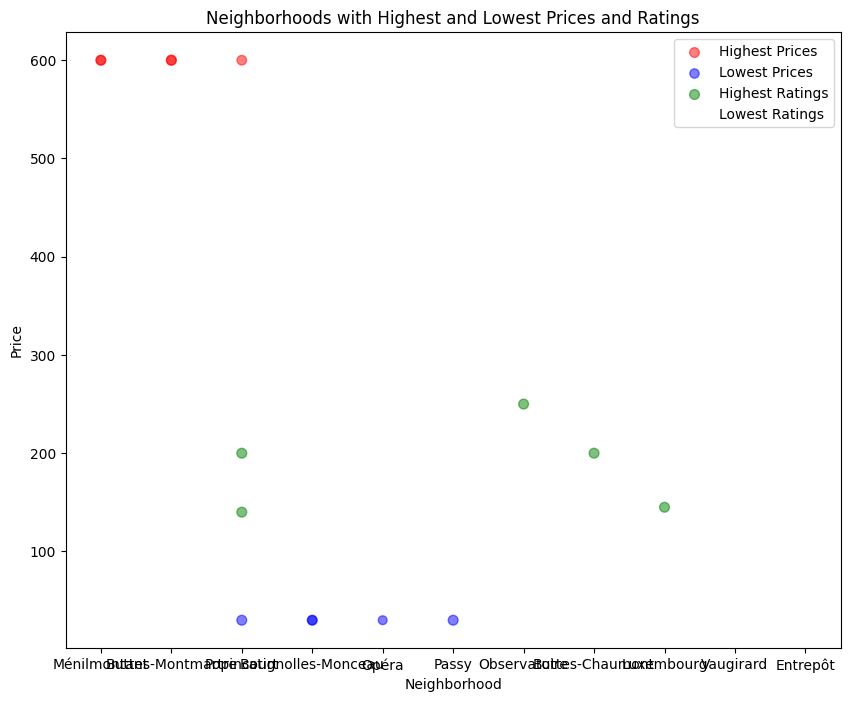

In [18]:
import matplotlib.pyplot as plt

# Filter the dataframe to get the neighborhoods with highest and lowest prices
highest_prices = df.nlargest(5, 'price')
lowest_prices = df.nsmallest(5, 'price')

# Filter the dataframe to get the neighborhoods with highest and lowest ratings
highest_ratings = df.nlargest(5, 'review_scores_rating')
lowest_ratings = df.nsmallest(5, 'review_scores_rating')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the neighborhoods with highest prices
ax.scatter(highest_prices['neighbourhood_cleansed'], highest_prices['price'], s=highest_prices['review_scores_rating']*10, c='red', alpha=0.5, label='Highest Prices')

# Plot the neighborhoods with lowest prices
ax.scatter(lowest_prices['neighbourhood_cleansed'], lowest_prices['price'], s=lowest_prices['review_scores_rating']*10, c='blue', alpha=0.5, label='Lowest Prices')

# Plot the neighborhoods with highest ratings
ax.scatter(highest_ratings['neighbourhood_cleansed'], highest_ratings['price'], s=highest_ratings['review_scores_rating']*10, c='green', alpha=0.5, label='Highest Ratings')

# Plot the neighborhoods with lowest ratings
ax.scatter(lowest_ratings['neighbourhood_cleansed'], lowest_ratings['price'], s=lowest_ratings['review_scores_rating']*10, c='orange', alpha=0.5, label='Lowest Ratings')

# Set labels and title
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Price')
ax.set_title('Neighborhoods with Highest and Lowest Prices and Ratings')

# Add legend
ax.legend()

# Show the plot
plt.show()

KNN

In [19]:
# Liste pour stocker les scores R² pour chaque modèle K-NN
r2_scores = []

for k in range(20, 35):
    # Créer et entraîner le modèle K-NN
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble de test
    y_pred_knn = knn_model.predict(X_test)
    
    # Évaluation du modèle
    r2_knn = r2_score(y_test, y_pred_knn)
    r2_scores.append(r2_knn)
    
    print(f"R² pour K-NN avec {k} voisins : {r2_knn}")

# Trouver le nombre optimal de voisins avec le meilleur score R²
best_k = np.argmax(r2_scores) + 1
best_r2_score = np.max(r2_scores)
print(f"Meilleur score R² : {best_r2_score} avec K = {best_k}")
# with range 20, 35 :
# R² pour K-NN avec 20 voisins : 0.3585233518681098
# R² pour K-NN avec 21 voisins : 0.35883997914936283
# R² pour K-NN avec 22 voisins : 0.3589013904524905
# R² pour K-NN avec 23 voisins : 0.35915340136685014
# R² pour K-NN avec 24 voisins : 0.35943083816345
# R² pour K-NN avec 25 voisins : 0.35937064551978004
# R² pour K-NN avec 26 voisins : 0.3587780841838174
# R² pour K-NN avec 27 voisins : 0.35902633691402797
# R² pour K-NN avec 28 voisins : 0.3589632645007106
# R² pour K-NN avec 29 voisins : 0.358741822253294
# R² pour K-NN avec 30 voisins : 0.3585602865212745
# R² pour K-NN avec 31 voisins : 0.3585763694467513
# R² pour K-NN avec 32 voisins : 0.358342830083748
# R² pour K-NN avec 33 voisins : 0.3581722885588251
# R² pour K-NN avec 34 voisins : 0.35798379527424906
# Meilleur score R² : 0.35943083816345 avec K = 5

R² pour K-NN avec 20 voisins : 0.3412184272921709
R² pour K-NN avec 21 voisins : 0.3407205573350397
R² pour K-NN avec 22 voisins : 0.3416192194634421


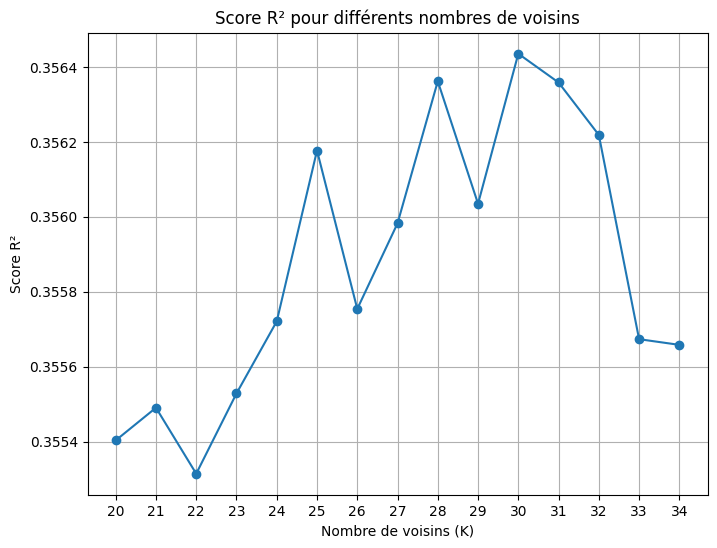

In [ ]:
# Liste des nombres de voisins
neighbors = list(range(20, 35))

plt.figure(figsize=(8, 6))
plt.plot(neighbors, r2_scores, marker='o', linestyle='-')
plt.title('Score R² pour différents nombres de voisins')
plt.xlabel('Nombre de voisins (K)')
plt.ylabel('Score R²')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

# Plot des vraies valeurs par rapport aux prédictions

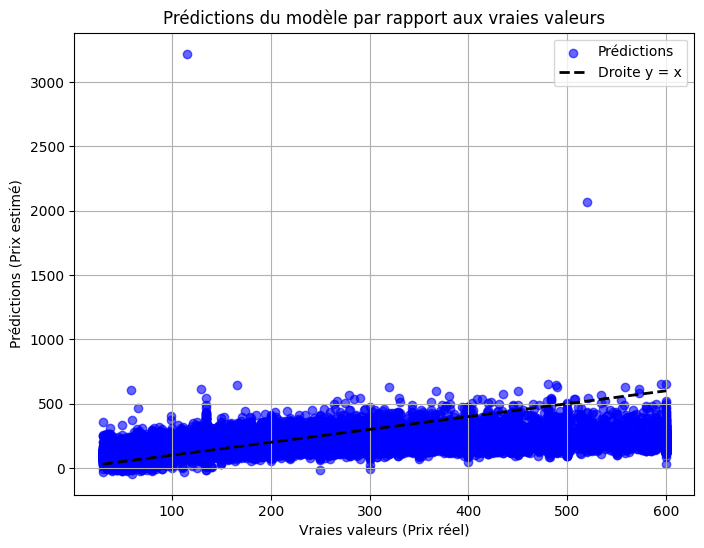

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Droite y = x')
plt.xlabel('Vraies valeurs (Prix réel)')
plt.ylabel('Prédictions (Prix estimé)')
plt.title('Prédictions du modèle par rapport aux vraies valeurs')
plt.legend()
plt.grid(True)
plt.show()


/Users/donyab/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


                   host_location neighbourhood_cleansed  predicted_price
16                Recife, Brazil                  Passy     -6767.338723
19                  New York, NY                 Louvre    -24576.251332
42        Abidjan, Côte d’Ivoire      Buttes-Montmartre      1403.020259
44                        France             Popincourt     -4062.831436
46        London, United Kingdom                  Passy    -36098.550921
...                          ...                    ...              ...
67358                 Austin, TX             Luxembourg      7011.493024
67629                    unknown      Buttes-Montmartre      8455.663964
67710                    unknown                 Élysée      6030.539660
67770                    unknown                  Opéra      9016.396070
67892  Neuilly-sur-Seine, France                Reuilly      4431.464167

[20984 rows x 3 columns]


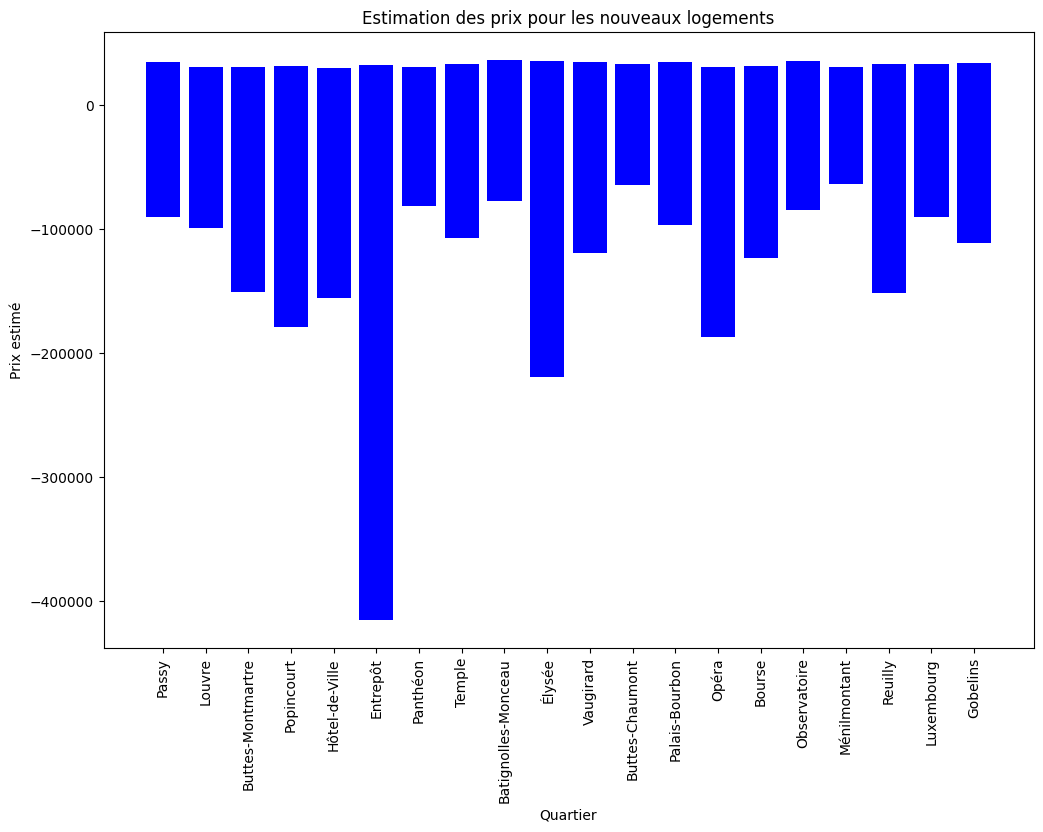

In [ ]:
# Supposons que filtered_df a été prétraité comme X
# Convertir les colonnes catégorielles en variables indicatrices (one-hot encoding)
filtered_df_encoded = pd.get_dummies(filtered_df)

# Assurez-vous que filtered_df_encoded contient les mêmes caractéristiques que X
common_columns = X.columns.intersection(filtered_df_encoded.columns)
filtered_df_encoded = filtered_df_encoded[common_columns]

# Faire des prédictions avec le modèle pour les nouveaux logements
predicted_prices = model.predict(filtered_df_encoded)

# Ajouter les prédictions de prix au DataFrame filtered_df
filtered_df['predicted_price'] = predicted_prices

# Afficher le DataFrame avec les prédictions de prix
print(filtered_df[['host_location', 'neighbourhood_cleansed', 'predicted_price']])

# Tracer le graphique pour les prédictions sur différentes périodes (à remplacer par votre code actuel)
# Créer une liste pour stocker les prix prédits des nouveaux logements
predicted_price_new_list = filtered_df['predicted_price']

# Créer une liste pour stocker les labels des nouveaux logements
labels_new = filtered_df['neighbourhood_cleansed']

# Tracer le graphique pour les prix prédits des nouveaux logements
plt.figure(figsize=(12, 8))
plt.bar(labels_new, predicted_price_new_list, color='blue')
plt.title('Estimation des prix pour les nouveaux logements')
plt.xlabel('Quartier')
plt.ylabel('Prix estimé')
plt.xticks(rotation=90)
plt.show()
